In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(dygraphs)
library(lubridate)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [3]:
contrib <- read.csv('contribsandspend.csv', check.names=FALSE)
#head(contrib)
#summary(contrib)

In [4]:
str(contrib)

'data.frame':	151845 obs. of  76 variables:
 $                              : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Date                         : Factor w/ 334 levels "1990-11-30","1990-12-31",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Contributor                  : Factor w/ 156 levels "Albania","Algeria",..: 4 4 4 6 6 6 7 7 7 7 ...
 $ Contributor_ISO-3            : Factor w/ 155 levels "ALB","ARE","ARG",..: 3 3 3 6 6 6 7 7 7 7 ...
 $ Contributor_Capital          : Factor w/ 157 levels "Abu Dhabi","Abuja",..: 35 35 35 38 38 38 146 146 146 146 ...
 $ Contributor_Capital_Latitude : num  -36.5 -36.5 -36.5 -35.2 -35.2 ...
 $ Contributor_Capital_Longitude: num  -60 -60 -60 149 149 ...
 $ Contributor_Continent        : Factor w/ 6 levels "Africa","Asia",..: 6 6 6 5 5 5 3 3 3 3 ...
 $ Contributor_Region           : Factor w/ 22 levels "Australia and New Zealand",..: 15 15 15 1 1 1 22 22 22 22 ...
 $ Contributor UN_Bloc          : Factor w/ 6 levels "AG","APG","EEG",..: 4 4 4 5 5 5 5 5 5 5 ...
 $ Contributor_

In [5]:
#Rename some columns that bug me (and getting rid of the % that R doesn't like)
names(contrib)[names(contrib) == "Inidividual_Police"] <- "Individual_Police"
names(contrib)[names(contrib) == "DefSpendGDP%"] <- "DefSpend"

In [6]:
# Replace NAs with zero
contrib[is.na(contrib)] = 0
# Drop geo columns and factors
nonnum <- names(Filter(is.factor, contrib))
xcluded <- c(nonnum, 'Mission_HQ_Longitude',"Mission_HQ_Latitude","Contributor_Capital_Latitude","Contributor_Capital_Longitude")
clustdata <- contrib[, -which(names(contrib) %in% xcluded)]
names(clustdata)


[1] ""                        "Contributor_NAM"        
 [3] "Contributor_G77"         "Contributor_AU"         
 [5] "Contributor_Arab_League" "Contributor_OIC"        
 [7] "Contributor_CIS"         "Contributor_G20"        
 [9] "Contributor_EU"          "Contributor_NATO"       
[11] "Contributor_G8"          "Contributor_OECD"       
[13] "Contributor_ASEAN"       "Contributor_OAS"        
[15] "Contributor_Shanghai"    "Contributor_GCC"        
[17] "Contributor_UMA"         "Contributor_COMESA"     
[19] "Contributor_CENSAD"      "Contributor_EAC"        
[21] "Contributor_ECCAS"       "Contributor_ECOWAS"     
[23] "Contributor_IGAD"        "Contributor_SADC"       
[25] "Mission_NAM"             "Mission_G77"            
[27] "Mission_AU"              "Mission_Arab_League"    
[29] "Mission_OIC"             "Mission_CIS"            
[31] "Mission_G20"             "Mission_EU"             
[33] "Mission_NATO"            "Mission_G8"             
[35] "Mission_OECD"            "Mission_ASEAN"          
[37] "Mission_OAS"             "Mission_Shanghai"       
[39] "Mission_GCC"             "Mission_UMA"            
[41] "Mission_COMESA"          "Mission_CENSAD"         
[43] "Mission_EAC"             "Mission_ECCAS"          
[45] "Mission_ECOWAS"          "Mission_IGAD"           
[47] "Mission_SADC"            "Experts_on_Mission"     
[49] "Formed_Police_Units"     "Individual_Police"      
[51] "Civilian_Police"         "Troops"                 
[53] "Observers"               "Total"                  
[55] "Year"                    "DefSpend"

In [7]:
str(clustdata)

'data.frame':	151845 obs. of  56 variables:
 $                        : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Contributor_NAM        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_G77        : int  1 1 1 0 0 0 0 0 0 0 ...
 $ Contributor_AU         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_Arab_League: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_OIC        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_CIS        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_G20        : int  1 1 1 1 1 1 0 0 0 0 ...
 $ Contributor_EU         : int  0 0 0 0 0 0 1 1 1 1 ...
 $ Contributor_NATO       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_G8         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_OECD       : int  0 0 0 1 1 1 1 1 1 1 ...
 $ Contributor_ASEAN      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_OAS        : int  1 1 1 0 0 0 0 0 0 0 ...
 $ Contributor_Shanghai   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_GCC        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_UMA        : int  0 0 0 0 0 0

In [8]:
# Just cluster on characteristics of contributor
contrib_clustdata <- clustdata %>% dplyr::select(-contains("Mission"))
head(contrib_clustdata)

,Contributor_NAM,Contributor_G77,Contributor_AU,Contributor_Arab_League,Contributor_OIC,Contributor_CIS,Contributor_G20,Contributor_EU,Contributor_NATO,⋯,Contributor_IGAD,Contributor_SADC,Formed_Police_Units,Individual_Police,Civilian_Police,Troops,Observers,Total,Year,DefSpend
0,0,1,0,0,0,0,1,0,0,,0,0,0,0,0,29,0,29,1990,1.450909
1,0,1,0,0,0,0,1,0,0,,0,0,0,0,0,6,0,6,1990,1.450909
2,0,1,0,0,0,0,1,0,0,,0,0,0,0,0,4,0,4,1990,1.450909
3,0,0,0,0,0,0,1,0,0,,0,0,0,0,26,0,0,26,1990,2.075906
4,0,0,0,0,0,0,1,0,0,,0,0,0,0,0,2,0,2,1990,2.075906
5,0,0,0,0,0,0,1,0,0,,0,0,0,0,0,13,0,13,1990,2.075906


In [9]:
contrib_sample <- sample_n(contrib_clustdata,10000)
contrib_sample <- contrib_sample[,-31] # Drop the Year 
str(contrib_sample)

'data.frame':	10000 obs. of  31 variables:
 $                        : int  38115 60430 17848 71654 95996 119322 24972 94686 940 145489 ...
 $ Contributor_NAM        : int  0 0 1 0 0 0 0 0 1 0 ...
 $ Contributor_G77        : int  0 0 1 0 0 0 0 1 1 0 ...
 $ Contributor_AU         : int  0 0 0 0 0 0 0 0 1 0 ...
 $ Contributor_Arab_League: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_OIC        : int  0 0 1 0 0 0 0 0 0 0 ...
 $ Contributor_CIS        : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_G20        : int  1 0 0 0 1 0 0 0 0 0 ...
 $ Contributor_EU         : int  0 1 0 0 0 1 1 0 0 1 ...
 $ Contributor_NATO       : int  0 1 0 0 1 1 1 0 0 0 ...
 $ Contributor_G8         : int  1 0 0 0 1 0 0 0 0 0 ...
 $ Contributor_OECD       : int  0 0 0 1 1 1 1 0 0 1 ...
 $ Contributor_ASEAN      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_OAS        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_Shanghai   : int  1 0 0 0 0 0 0 0 0 0 ...
 $ Contributor_GCC        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Co

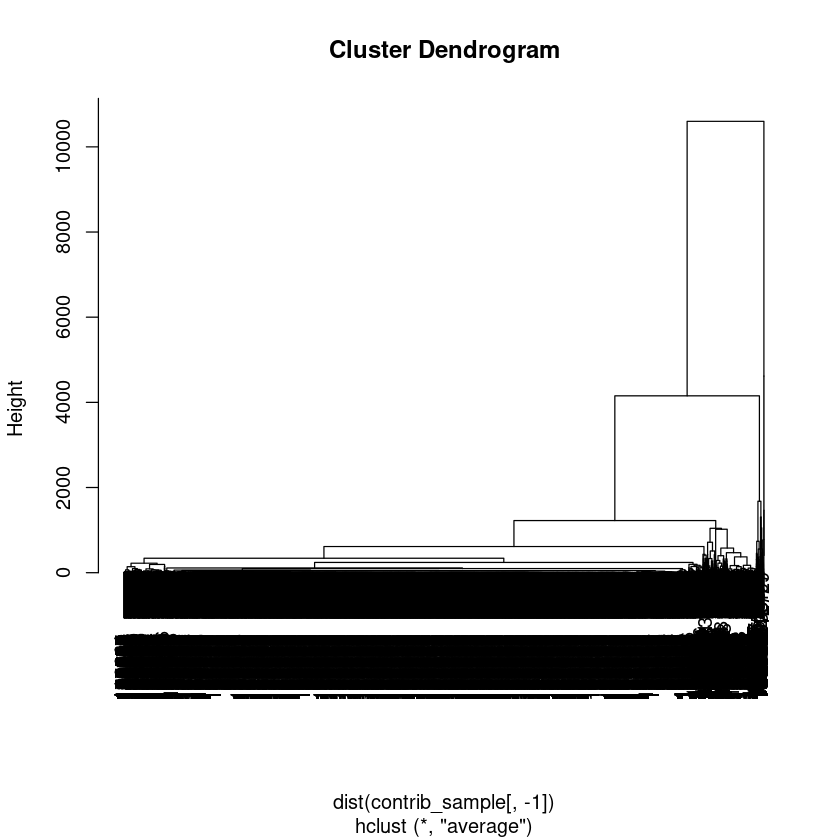

In [10]:
set.seed(100)
clust <- hclust(dist(contrib_sample[,-1]), method="average")
plot(clust)

In [11]:
contrib_sample$cluster <- as.factor(cutree(clust, 6))
sum(contrib_sample$cluster==1)
sum(contrib_sample$cluster==2)
sum(contrib_sample$cluster==3)
sum(contrib_sample$cluster==4)
sum(contrib_sample$cluster==5)
sum(contrib_sample$cluster==6)

[1] 9879

[1] 56

[1] 61

[1] 2

[1] 1

[1] 1

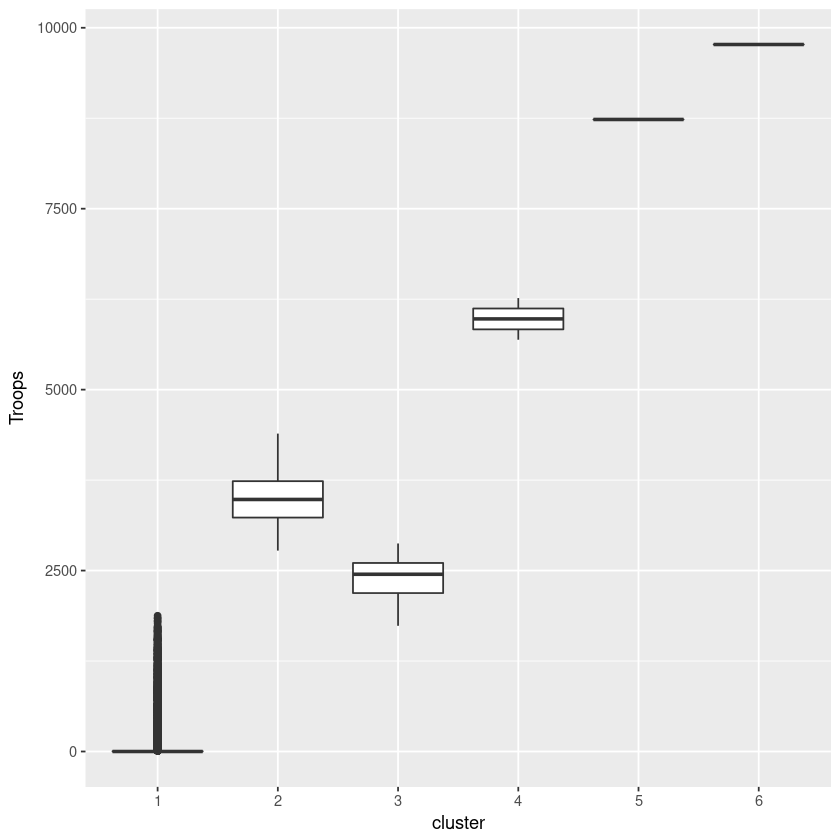

In [12]:
ggplot(contrib_sample, aes(x=cluster, y=Troops)) +geom_boxplot()

In [13]:
# Splitting into train/test to see if an LDA model can predict the clusters 
library(caTools)
set.seed(100) # set.seed() will help us to reproduce the results.
split = sample.split(contrib_sample$cluster, SplitRatio=0.7)

sample_train  = subset(contrib_sample, split==TRUE)

# Test data will have the rest 30% of data
sample_test  = subset(contrib_sample, split==FALSE)


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Warning message in lda.default(x, grouping, ...):
"variables are collinear"

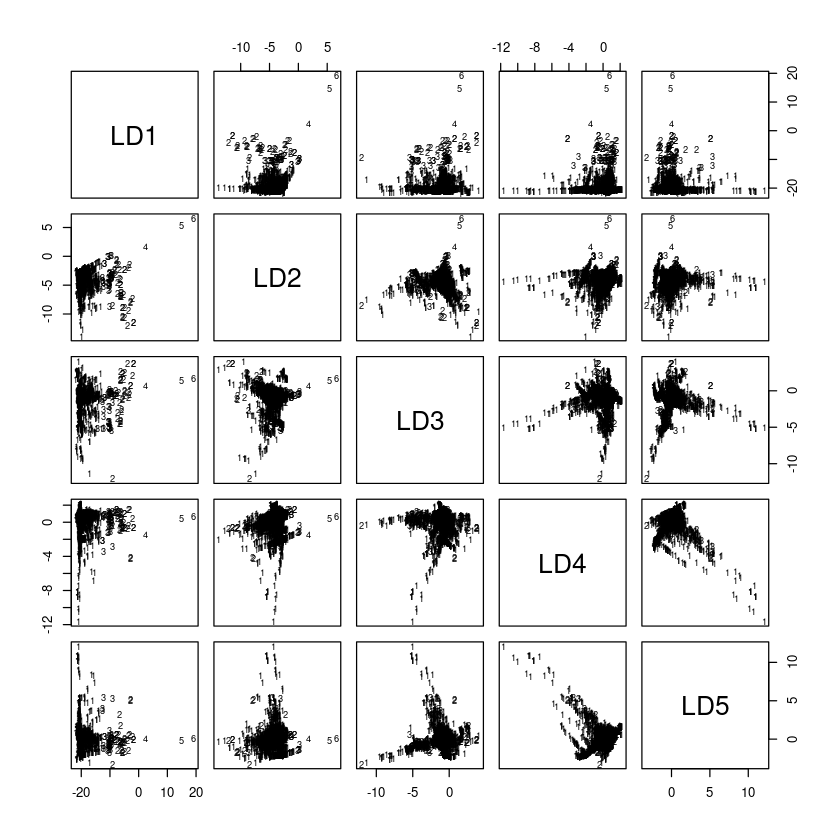

In [14]:
library(MASS)
ldafit=lda(cluster~ .,data=sample_train[,-1]) #All variable except the contributor name
plot(ldafit)

In [15]:
summary(ldafit)

        Length Class  Mode     
prior     6    -none- numeric  
counts    6    -none- numeric  
means   180    -none- numeric  
scaling 150    -none- numeric  
lev       6    -none- character
svd       5    -none- numeric  
N         1    -none- numeric  
call      3    -none- call     
terms     3    terms  call     
xlevels   0    -none- list     

In [16]:
pred <- predict(ldafit, sample_test)

In [17]:
# Create a confusion table.
table(pred$class, sample_test$cluster)
mean(pred$class==sample_test$cluster)


   
       1    2    3    4    5    6
  1 2950    0    0    0    0    0
  2    0   11    0    0    0    0
  3   14    6   18    0    0    0
  4    0    0    0    1    0    0
  5    0    0    0    0    0    0
  6    0    0    0    0    0    0

[1] 0.9933333

In [18]:
# re-do clustering and LDA with just nonzero contributions
contrib_clustdata2 <- subset(contrib_clustdata, contrib_clustdata$Troops>0)
contrib_sample2 <- sample_n(contrib_clustdata2,10000)
contrib_sample2 <- contrib_sample2[,-31] # Drop the Year 

In [19]:
set.seed(100)
clust2 <- hclust(dist(contrib_sample2[,-1]), method="average")
#plot(clust2)

In [29]:
contrib_sample2$cluster <- as.factor(cutree(clust2, 4))
sum(contrib_sample2$cluster==1)
sum(contrib_sample2$cluster==2)
sum(contrib_sample2$cluster==3)
sum(contrib_sample2$cluster==4)
sum(contrib_sample2$cluster==5)
sum(contrib_sample2$cluster==6)

[1] 338

[1] 9656

[1] 5

[1] 1

[1] 0

[1] 0

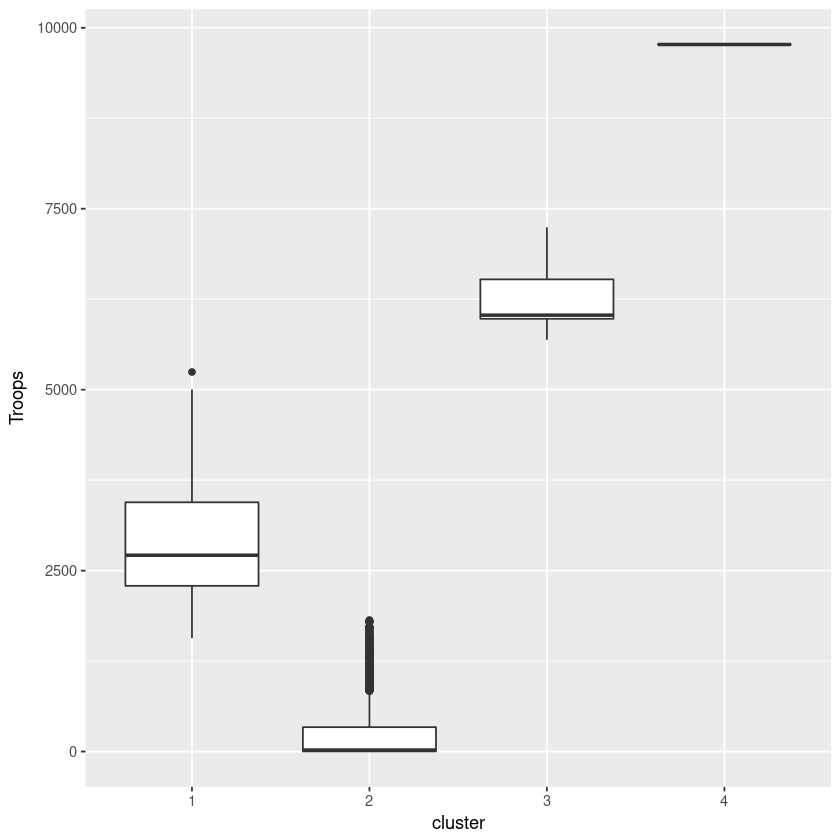

In [30]:
ggplot(contrib_sample2, aes(x=cluster, y=Troops)) +geom_boxplot()

In [35]:
# Splitting into train/test to see if an LDA model can predict the clusters 
library(caTools)
set.seed(100) # set.seed() will help us to reproduce the results.
split = sample.split(contrib_sample2$cluster, SplitRatio=0.7)

sample_train2  = subset(contrib_sample2, split==TRUE)

# Test data will have the rest 30% of data
sample_test2  = subset(contrib_sample2, split==FALSE)

Warning message in lda.default(x, grouping, ...):
"variables are collinear"

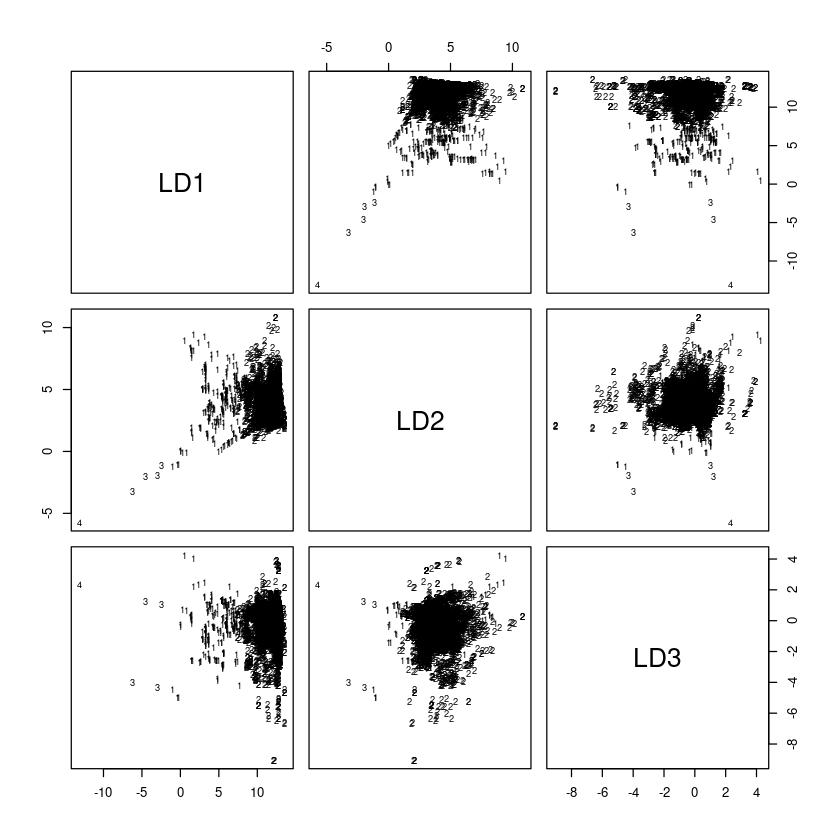

In [36]:
library(MASS)
ldafit2=lda(cluster~ .,data=sample_train2[,-1]) #All variable except the contributor name
plot(ldafit2)

In [37]:
pred2 <- predict(ldafit2, sample_test2)

In [38]:
# Create a confusion table.
table(pred2$class, sample_test2$cluster)
mean(pred2$class==sample_test2$cluster)

   
       1    2    3    4
  1   98    5    0    0
  2    1 2892    0    0
  3    2    0    1    0
  4    0    0    0    0

[1] 0.9973324

In [23]:
#library(ggfortify)

contrib.pca <- prcomp(clustdata[,-1])
contrib.pca

Standard deviations (1, .., p=55):
 [1] 6.037172e+02 7.026299e+01 2.299423e+01 1.427343e+01 8.506037e+00
 [6] 7.091664e+00 3.267851e+00 1.111621e+00 1.027283e+00 7.604409e-01
[11] 5.814194e-01 5.509852e-01 5.381532e-01 5.177710e-01 4.596804e-01
[16] 3.913300e-01 3.329230e-01 3.303666e-01 3.007052e-01 2.890133e-01
[21] 2.650090e-01 2.468197e-01 2.364164e-01 2.245422e-01 2.113398e-01
[26] 2.028495e-01 1.968908e-01 1.902142e-01 1.782125e-01 1.732781e-01
[31] 1.685048e-01 1.632204e-01 1.568905e-01 1.532274e-01 1.517211e-01
[36] 1.459524e-01 1.371805e-01 1.339902e-01 1.068104e-01 1.034368e-01
[41] 9.697716e-02 9.044203e-02 8.211257e-02 7.996929e-02 7.381048e-02
[46] 7.218852e-02 5.769721e-02 5.566791e-02 3.152380e-02 5.127427e-03
[51] 2.681043e-13 5.921308e-14 5.921308e-14 5.921308e-14 5.921308e-14

Rotation (n x k) = (55 x 55):
                                  PC1           PC2           PC3           PC4
Contributor_NAM          1.317057e-04 -1.010313e-03 -4.298114e-04 -3.003008e-03
Cont

In [24]:
contrib.plot <- autoplot(contrib.pca, data = clustdata, colour = 'Contributor_Continent')
contrib.plot

ERROR: Error: Objects of type prcomp not supported by autoplot.


In [ ]:
train <- clustdata[,c(2,4,6,10:18)]
train <- distinct(train)
install.packages('Rtsne')
library(Rtsne)
## Curating the database for analysis with both t-SNE and PCA
Labels<-train$Contributor_Continent
train$Contributor_Continent<-as.factor(train$Contributor_Continent)
## for plotting
colors = rainbow(length(unique(train$Contributor_Continent)))
names(colors) = unique(train$Contributor_Continent)

 

## Executing the algorithm on curated data
tsne <- Rtsne(train[,-1], dims = 2, perplexity=5, verbose=TRUE, max_iter = 500,check_duplicates = FALSE)
#exeTimeTsne<- system.time(Rtsne(train[,-1], dims = 2, perplexity=30, verbose=TRUE, max_iter = 500))

 

## Plotting
plot(tsne$Y, t='n', main="tsne")
text(tsne$Y, labels=train$`Contributor_ISO-3`, col=colors[train$Contributor_Continent])